<a href="https://colab.research.google.com/github/garvjain7/Chatbot/blob/main/complete_college_ml_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To implement and execute data preprocessing.
Aim for experiment: to implement and execute data preprocessing technique using .csv file
(groupby, dtype, NaN, histogram, imputer, sklearn library, missing values and iloc)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Data.csv')
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [ ]:
print(df.describe())
print()
print(df.shape)
print()
print(df.info())
print()
print(df.dtypes)
print()
print(df.isnull())
print()
print(df.isnull().sum())
print()
print(df.isnull().sum().sum())
print()

             Age        Salary
count   9.000000      9.000000
mean   38.777778  63777.777778
std     7.693793  12265.579662
min    27.000000  48000.000000
25%    35.000000  54000.000000
50%    38.000000  61000.000000
75%    44.000000  72000.000000
max    50.000000  83000.000000

(10, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 452.0+ bytes
None

Country       object
Age          float64
Salary       float64
Purchased     object
dtype: object

   Country    Age  Salary  Purchased
0    False  False   False      False
1    False  False   False      False
2    False  False   False      False
3    False  False   False      False
4    False  False    Tr

In [ ]:
class_count = df.groupby('Purchased').size()
print(class_count)

Purchased
No     5
Yes    5
dtype: int64


In [ ]:
country_count = df.groupby('Country').size()
print(country_count)

Country
France     4
Germany    3
Spain      3
dtype: int64


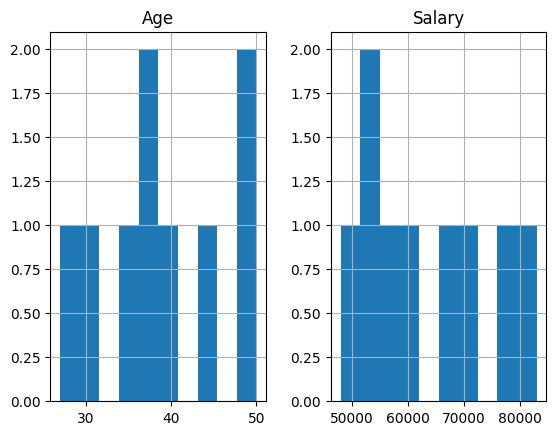

In [ ]:
from matplotlib import pyplot as plt
df.hist() # to show histogram for the dataset
plt.show()

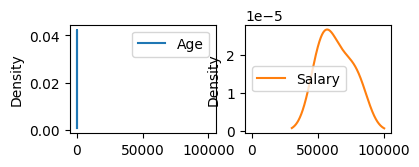

In [ ]:
df.plot(kind='density', subplots=True, layout=(3,3), sharex=True) # shows the density, allowing subplots, and sharing the x axis, as only y changes between age and salary
plt.show()

In [ ]:
X = df.iloc[:,[0,1,2]].values
Y = df.iloc[:,3].values

In [ ]:
print(X)
print()
print(Y)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean') # , fill_value=None, VERBOSE=1, copy=True -> this would run in colab but not in jupyter
imputer = imputer.fit(X[:, 1:3]) # teaching imputer which columns to fill and check. [:, 1:3], first ':' means all rows and '1:3' means column 1 o column 2. Python avoids the last column 3
X[:,1:3] = imputer.transform(X[:, 1:3]) # now we are transforming the values in the data

In [ ]:
df = pd.DataFrame(X)
print(df)

print()
# OR
print()

print(X)

         0          1             2
0   France       44.0       72000.0
1    Spain       27.0       48000.0
2  Germany       30.0       54000.0
3    Spain       38.0       61000.0
4  Germany       40.0  63777.777778
5   France       35.0       58000.0
6    Spain  38.777778       52000.0
7   France       48.0       79000.0
8  Germany       50.0       83000.0
9   France       37.0       67000.0


[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [ ]:
details = pd.DataFrame(X, columns=['Country', 'Age', 'Salary'])
details.isnull().sum()

,0
Country,0
Age,0
Salary,0


**EXPERIMENT - 3** -> Linear Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # to plot the graphs we can use this
from sklearn.model_selection import train_test_split # for machine learning model train function
from sklearn.linear_model import LinearRegression # The algorithm that is applied to the data
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # to calculate error, error percentage, and the score the algorithm get.

In [ ]:
from google.colab import files
uploaded = files.upload()
url = 'https://raw.githubusercontent.com/singhudaypratap/ML_LAB_datasets/main/Salary_Data.csv'
dataset = pd.read_csv(url)
dataset

In [ ]:
df = pd.read_csv('Salary_Data.csv')
print(df)
print()
print(df.shape)
print()
print(df.info())
print()
print(df.dtypes)
print()
print(df.isnull().sum())
print()

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0

(30, 2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries

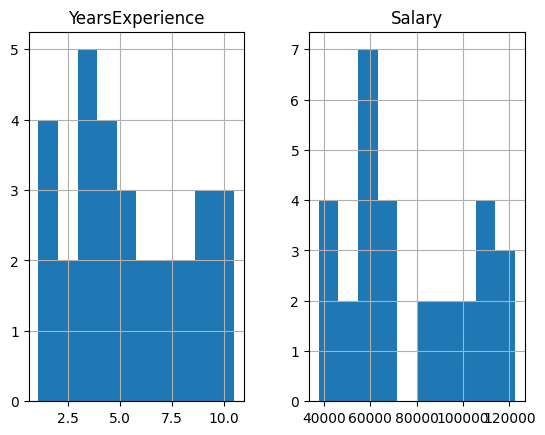

In [ ]:
from matplotlib import pyplot as plt
df.hist() # to show histogram for the dataset
plt.show()

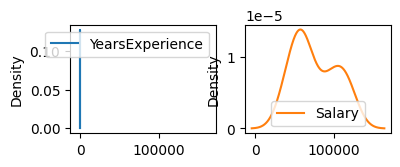

In [ ]:
df.plot(kind='density', subplots=True, layout=(3,3), sharex=True) # shows the density, allowing subplots, and sharing the x axis, as only y changes between age and salary
plt.show()

YearsExperience    0
Salary             0
dtype: int64


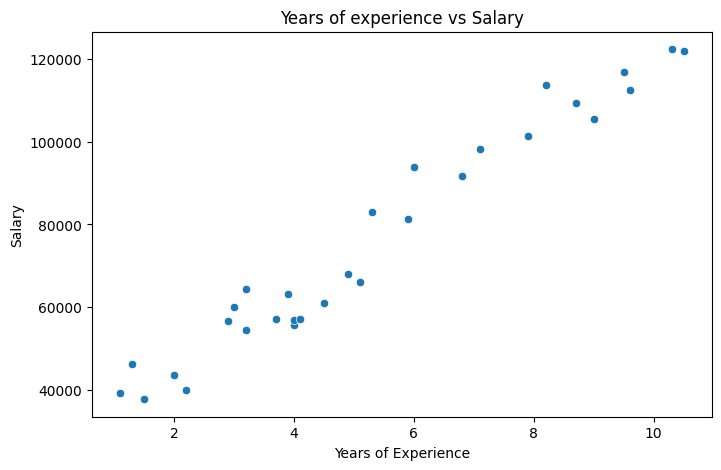

In [ ]:
print(df.isnull().sum())

# plot data distribution
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['YearsExperience'], y=df['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Years of experience vs Salary')
plt.show()

In [ ]:
X1 = df.iloc[:, 0:1].values
Y1 = df.iloc[:,1].values
print(X1)
print()
print(Y1)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]

[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [ ]:
# Taking care of missing values (if any)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X1[:,:])
X1[:,:] = imputer.transform(X1[:,:])
print(X1)
print()
print(Y1)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]

[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [ ]:
details1 = pd.DataFrame(X1, columns=['YearsExperience'])
details1.isnull().sum()

,0
YearsExperience,0


In [ ]:
# Splitting the data into feature(x) and target variable(y)
x=df[['YearsExperience']] # independent variable
y=df['Salary'] # dependent variable

# Splitting into training(80%) and testing(20%) sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, train_size=0.8, random_state = 0)
# random_state is used to control the randomness of how the data is splitted or shuffled

# Checking data split sizes
x_train.shape, x_test.shape

((24, 1), (6, 1))

In [ ]:
print(x_train)
print()
print(x_test)

    YearsExperience
27              9.6
11              4.0
17              5.3
22              7.9
5               2.9
16              5.1
8               3.2
14              4.5
23              8.2
20              6.8
1               1.3
29             10.5
6               3.0
4               2.2
18              5.9
19              6.0
9               3.7
7               3.2
25              9.0
3               2.0
0               1.1
21              7.1
15              4.9
12              4.0

    YearsExperience
2               1.5
28             10.3
13              4.1
10              3.9
26              9.5
24              8.7


In [ ]:
# creating and training the simple linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

print(f"Intercept(Predicted Salary when year of experience is 0): {model.intercept_}") # printing the model intercept
print(f"Coefficient(amount of salary increased per year on basis of experience): {model.coef_[0]}") # and the model coefficient

Intercept(Predicted Salary when year of experience is 0): 26780.09915062818
Coefficient(amount of salary increased per year on basis of experience): 9312.575126729189


In [ ]:
y_pred = model.predict(x_test)
print(y_pred)
results = pd.DataFrame({'Actual Salary': y_test.values, 'Predicted Salary': y_pred})
results.head()

[ 40748.96184072 122699.62295594  64961.65717022  63099.14214487
 115249.56285456 107799.50275317]


,Actual Salary,Predicted Salary
0,37731.0,40748.961841
1,122391.0,122699.622956
2,57081.0,64961.657170
3,63218.0,63099.142145
4,116969.0,115249.562855


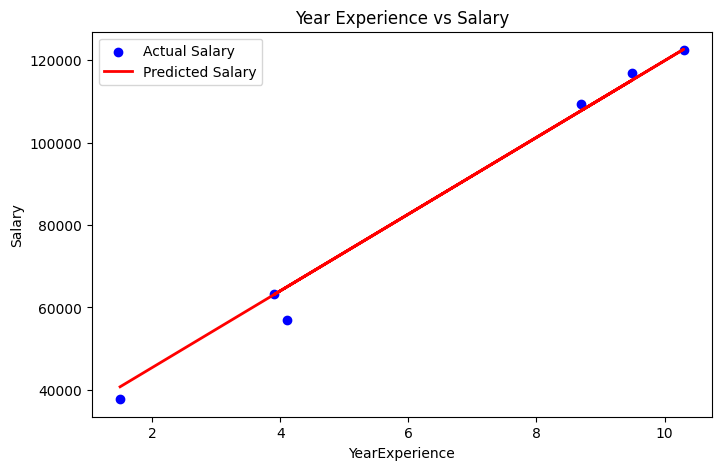

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(x_test, y_test, color='blue', label='Actual Salary')
plt.plot(x_test, y_pred, color='red', linewidth=2, label='Predicted Salary')
plt.xlabel('YearExperience')
plt.ylabel('Salary')
plt.title('Year Experience vs Salary')
plt.legend()
plt.show()

In [ ]:
# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 2446.1723690465055
Mean Squared Error: 12823412.298126549
R-squared: 0.988169515729126


In [ ]:
# Predict salary based on user input
# experience = float(input("Enter years of experience: "))
# if 0 <= experience <= 40:
#   predicted_salary = model.predict([[experience]])[0] # this 0 in index values defines that it takes the first value of the array of predicted salary
#   print(f"Predicted salary for {experience} years of experience: ${predicted_salary:,.2f}") # we can also write [0] here after predicted salary and remove from previous line. it worked the same.
# else:
#   print("Enter a valid range of experience (0-40 years)")

import pandas as pd

while True:
    try:
        experience = float(input("Enter years of experience (0-40): "))

        if 0 <= experience <= 40:
            # Use DataFrame instead of list
            input_data = pd.DataFrame(
                {"YearsExperience": [experience]}
            )

            predicted_salary = model.predict(input_data)[0]

            print(
                f"Predicted salary for {experience} years of experience: "
                f"{predicted_salary:,.2f}"
            )
            break
        else:
            print("❌ Error: Experience should be between 0 and 40 years. Please try again.")

    except ValueError:
        print("❌ Invalid input! Please enter a numeric value.")


Enter years of experience (0-40): 35
Predicted salary for 35.0 years of experience: 352,720.23


In [ ]:
# multiple linear regression


**Decision Tree -  Experiment 4**

In [ ]:
# Actual/Prediction     Disease         No Disease
# ------------------------------------------------------
# Disease           |  True Positive  | False Negative
# No Disease        |  False Positive | True Negative

# True Positive -> Report is Positive, and that prediction is true about disease : confusion matrix gives true
# False Negative -> Report is Negative, but the prediction is false about disease : confusion matrix gives true
# False Positive -> Report is Positive, but the prediction is false about disease : confusion matrix gives false
# True Negative -> Report is Negative, and that prediction is true about disease : confusion matrix gives false

In [ ]:
# precision - TP / (TP+FP) => [False Alarm should be less]
# recall - TP / (TP + FN) => [missed cases should be less]
# f1 score - (precision * recall) / (precision + recall) => [average of precision and recall]
# confusion matrix - it is like a report card
# confusion matrix heat map


# Numerical
# Actual/Prediction     Disease         No Disease
# ------------------------------------------------------
# Disease           |  True Positive(40)  | False Negative(10)
# No Disease        |  False Positive(5)  | True Negative(45)

# precision = 40/(40+5)
# print(precision)
# recall = 40/(40+10)
# print(recall)
# f1_score = 2*(precision*recall)/(precision+recall)
# print(f1_score)

0.8888888888888888
0.8
0.8421052631578948


To classify data using decision tree algoritm

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# import pandas as pd

# url = 'https://raw.githubusercontent.com/Anny8910/Decision-Tree-Classification-on-Diabetes-Dataset/master/diabetes_dataset.csv'
# df_diabetes = pd.read_csv(url)
# display(df_diabetes.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dataframe = pd.read_csv('diabetes_dataset.csv')
dataframe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
print(dataframe.isnull().sum())
print()
print(dataframe.dtypes)
print()
print(dataframe.shape)
print()
print(dataframe.info())
print()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

(768, 9)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null

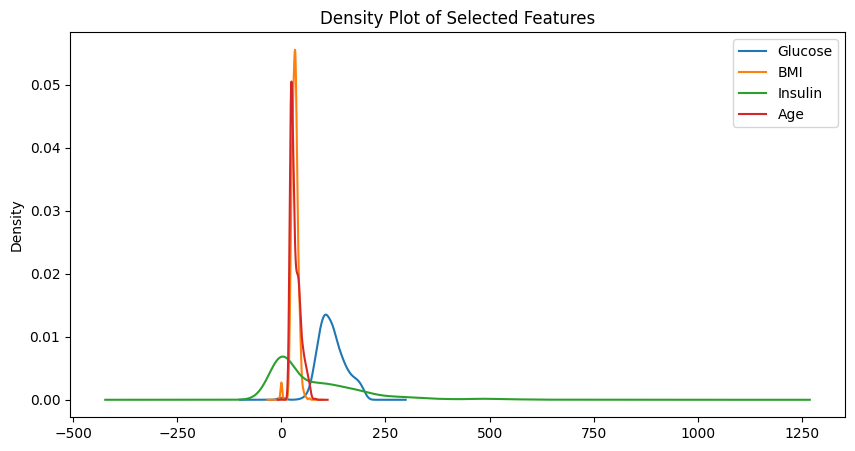

In [ ]:
import matplotlib.pyplot as plt

dataframe[["Glucose", "BMI", "Insulin", "Age"]].plot(kind="density", figsize=(10,5))
plt.title("Density Plot of Selected Features")
plt.show()

In [ ]:
# Feature (x) and Target variable (y)
x = dataframe.drop("Outcome", axis=1)
y = dataframe["Outcome"]

# splitting the dataset -> training = 80%, testing = 20%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Shape of training and testing data
x_train.shape, x_test.shape

((614, 8), (154, 8))

In [ ]:
# Create and train decision tree
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
y_pred_prob = model.predict_proba(x_test)[:, 1]
print(y_pred)
print()
print(y_pred_prob)

[0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1
 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0
 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 1]

[0.28571429 0.07657658 0.28571429 0.28571429 0.5625     0.28571429
 0.07657658 0.07657658 0.5625     0.14814815 0.83333333 0.28571429
 0.5625     0.07657658 0.07657658 0.07657658 0.5625     0.5625
 0.83333333 0.07657658 0.14814815 0.83333333 0.07657658 0.07657658
 0.07657658 0.48148148 0.70833333 0.70833333 0.5625     0.07657658
 0.07657658 0.28571429 0.07657658 0.07657658 0.70833333 0.07657658
 0.83333333 0.07657658 0.07657658 0.28571429 0.28571429 0.07657658
 0.83333333 0.5625     0.83333333 0.07657658 0.28571429 0.07657658
 0.14814815 0.07657658 0.07657658 0.07657658 0.83333333 0.5625
 0.07657658 0.07657658 0.5625     0.07657658 0.14814815 0.07657658
 0.70833333 0.07657658 

In [ ]:
# Model Evaluation
acc  = accuracy_score(y_test, y_pred)
# prec = precision_score(y_test, y_pred)
# rec  = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y)

print(f"Accuracy Score: {acc}")
print()
# print(f"Precision Score: {prec}")
# print()
# print(f"Recall Score: {rec}")
# print()
# print(f"F1 Score: {f1}")
# print()
print("---- Classification Report ----")
print(classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes']))
print()
print("---- Confusion Matrix ----")
print(confusion_matrix(y_test, y_pred))

Accuracy Score: 0.7532467532467533

---- Classification Report ----
              precision    recall  f1-score   support

 No Diabetes       0.77      0.87      0.82        97
    Diabetes       0.71      0.56      0.63        57

    accuracy                           0.75       154
   macro avg       0.74      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154


---- Confusion Matrix ----
[[84 13]
 [25 32]]


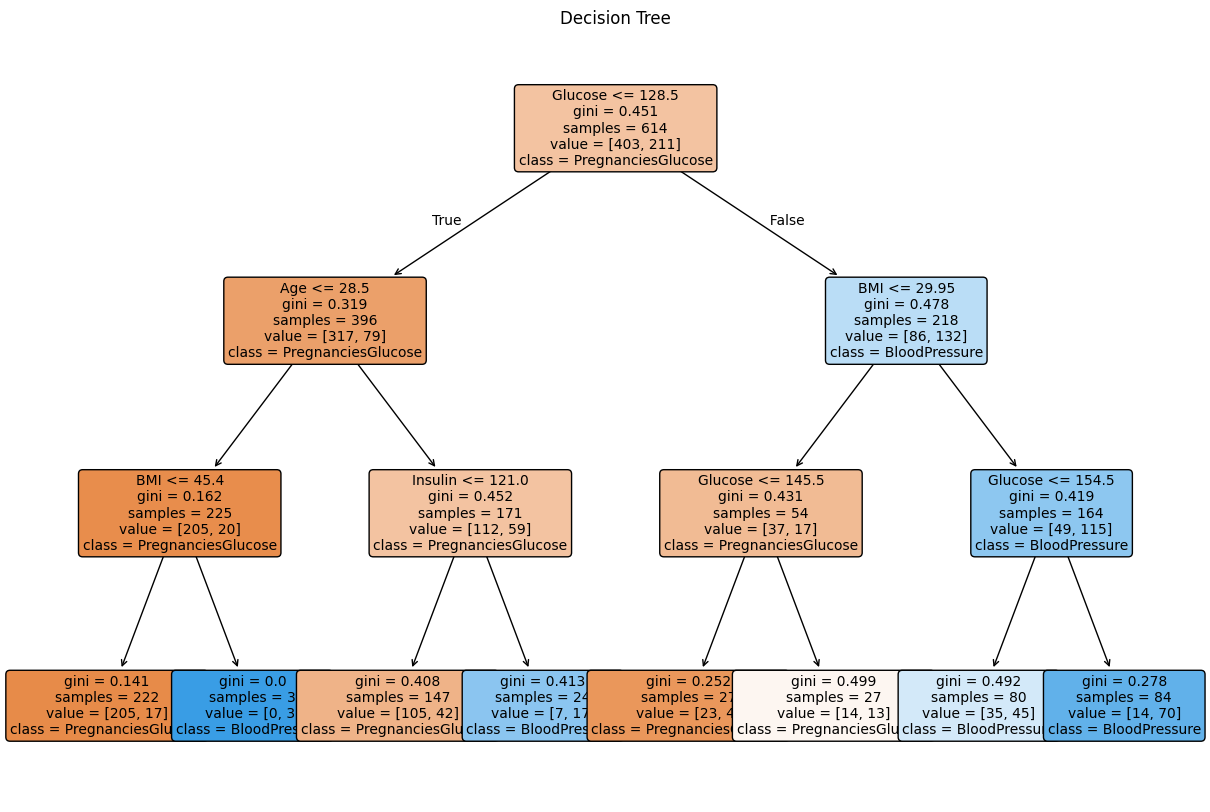

In [ ]:
plt.figure(figsize=(15,10))
plot_tree(model,
          feature_names = x.columns,
          class_names = ['Pregnancies''Glucose', 'BloodPressure', 'BMI', 'Age'],
          filled = True,
          rounded = True,
          fontsize=10)
plt.title("Decision Tree")
plt.show()

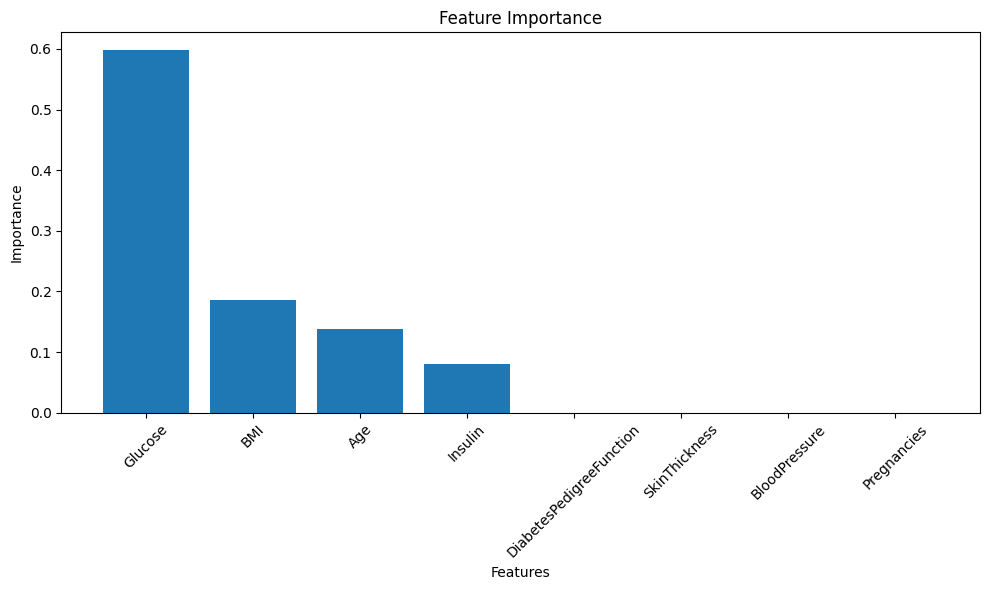

In [ ]:
plt.figure(figsize=(10,6))
features = x.columns
importance = model.feature_importances_
indices = np.argsort(importance)[::-1]

plt.bar(range(len(features)), importance[indices])
plt.xticks(range(len(features)), [features[i] for i in indices], rotation = 45)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

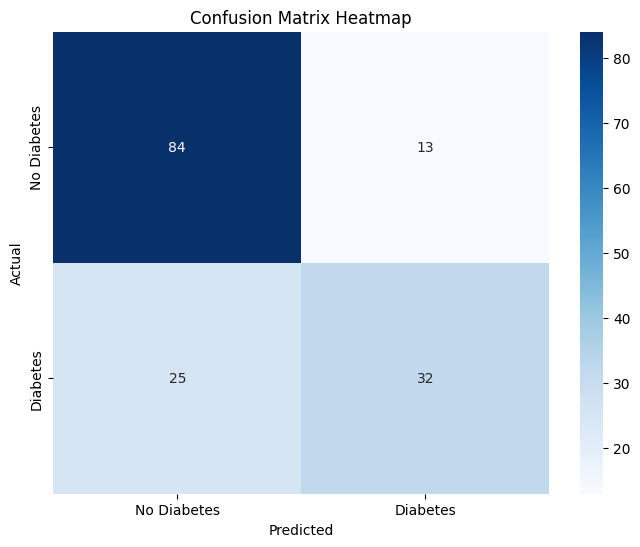

In [ ]:
import seaborn as sns

plt.figure(figsize=(8,6))
# Calculate the confusion matrix again if it wasn't stored in a variable previously
# Assuming y_test and y_pred are available from previous cells
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'], # Correct class labels
            yticklabels=['No Diabetes', 'Diabetes']) # Correct class labels
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Model Deployment - Experiment 4**

In [ ]:
print("🔬 Experiment 4: Model Deployment")
print("="*60)

import joblib
import pickle
from datetime import datetime
import numpy as np # Ensure numpy is imported for array creation
import pandas as pd # Ensure pandas is imported for DataFrame creation

# Save model using joblib (more efficient for numpy arrays)
joblib.dump(model, 'decision_tree_model.joblib')
print("1. Model saved using joblib: 'decision_tree_model.joblib'")

# Save model using pickle
with open('decision_tree_model.pkl', 'wb') as f: # wb -> binary write mode
    pickle.dump(model, f)
print("2. Model saved using pickle: 'decision_tree_model.pkl'")

# Define class labels for the diabetes dataset
class_labels = {0: 'No Diabetes', 1: 'Diabetes'}

# Demonstrate loading and using the model
print("\n3. Demonstrating model loading and prediction:")
# Load the saved model
loaded_model = joblib.load('decision_tree_model.joblib')

# Create a new sample for prediction (8 features for diabetes dataset)
# Features: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age
# Convert new_sample to pandas DataFrame with correct column names
new_sample = pd.DataFrame(np.array([[2, 120, 70, 30, 100, 30.0, 0.5, 30]]), columns=x.columns) # Example: a non-diabetic case

# Make prediction
prediction = loaded_model.predict(new_sample)
prediction_proba = loaded_model.predict_proba(new_sample)
print(f"\nNew sample: {new_sample.values[0]}")
print(f"Predicted class: {class_labels[prediction[0]]}")
print(f"Class probabilities: {prediction_proba[0]}")

# Create a simple prediction function
def predict_diabetes(pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, dpf, age):
    """Predict diabetes outcome from patient measurements."""
    # Convert sample to pandas DataFrame with correct column names
    sample = pd.DataFrame(np.array([[pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, dpf, age]]), columns=x.columns)
    prediction = loaded_model.predict(sample)
    return class_labels[prediction[0]]

print("\n4. Test the prediction function:")
# Sample 1: Expected No Diabetes
print(f"Sample 1 (No Diabetes): {predict_diabetes(1, 85, 66, 29, 0, 26.6, 0.351, 31)}")
# Sample 2: Expected Diabetes
print(f"Sample 2 (Diabetes): {predict_diabetes(6, 148, 72, 35, 0, 33.6, 0.627, 50)}")
print("\n✅ Experiment 4 Complete!")

🔬 Experiment 4: Model Deployment
1. Model saved using joblib: 'decision_tree_model.joblib'
2. Model saved using pickle: 'decision_tree_model.pkl'

3. Demonstrating model loading and prediction:

New sample: [  2.  120.   70.   30.  100.   30.    0.5  30. ]
Predicted class: No Diabetes
Class probabilities: [0.71428571 0.28571429]

4. Test the prediction function:
Sample 1 (No Diabetes): No Diabetes
Sample 2 (Diabetes): Diabetes

✅ Experiment 4 Complete!


**EXPERIMENT - 5 => NAIVE BIAS ALGORITHM**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [ ]:
dataframe = pd.read_csv('diabetes_dataset.csv')
dataframe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
# Feature (x) and Target variable (y)
x = dataframe.drop("Outcome", axis=1)
y = dataframe["Outcome"]

# splitting the dataset -> training = 80%, testing = 20%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Shape of training and testing data
x_train.shape, x_test.shape

((614, 8), (154, 8))

In [ ]:
nb = GaussianNB()
nb.fit(x_train, y_train)

y_pred_nb = nb.predict(x_test)
y_pred_proba_nb = nb.predict_proba(x_test)

In [ ]:
# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)

print("Model Performance:")
print(f"Accuracy: {accuracy_nb:.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_nb,
                           target_names=['No Diabetes', 'Diabetes']))

# Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

Model Performance:
Accuracy: 0.7338

Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.80      0.82      0.81       107
    Diabetes       0.57      0.53      0.55        47

    accuracy                           0.73       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.73      0.73      0.73       154



Text(0.5, 25.722222222222214, 'Predicted Label')

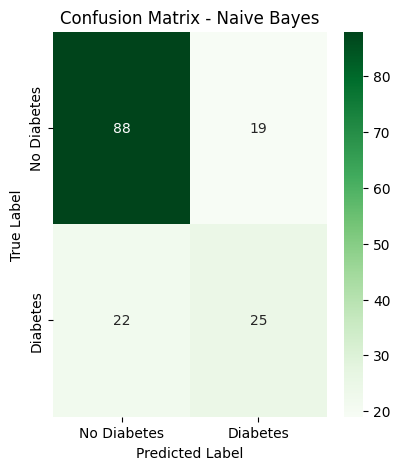

In [ ]:
# Visualization 1: Confusion Matrix
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix - Naive Bayes')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

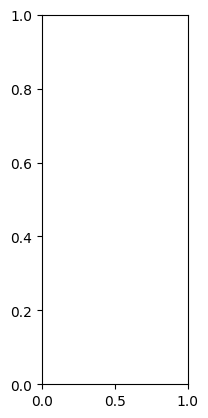

In [ ]:
# Visualization 2: ROC Curve (for multi-class)
plt.subplot(1, 3, 2)
# Binarize the output for ROC curve
y_test_bin = label_binarize(y_test, classes=[0, 1]) # Diabetes dataset has 2 classes: 0 and 1
n_classes = y_test_bin.shape[1]

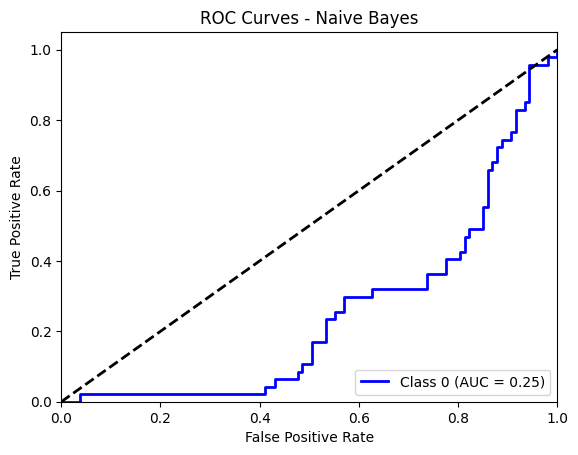

In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba_nb[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

colors = ['blue', 'red'] # Only 2 classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Naive Bayes')
plt.legend(loc="lower right")

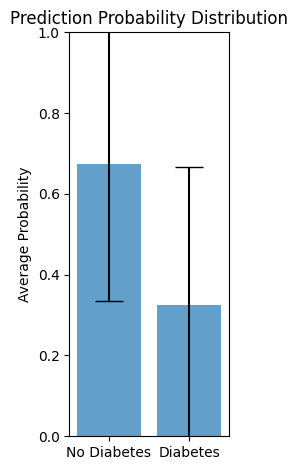


📊 Key Statistics:
Prior Probabilities: [0.64006515 0.35993485]
Class Counts: [393. 221.]

Feature means by class:
No Diabetes: [  3.30788804 109.17302799  68.18320611  20.02544529  71.17048346
  30.32417303   0.42898473  31.01272265]
Diabetes: [  4.92307692 141.2081448   70.43891403  22.46606335 102.11312217
  35.45656109   0.56581448  36.95022624]

✅ Experiment 5 Complete!


In [ ]:
# Visualization 3: Probability Distribution
plt.subplot(1, 3, 3)
class_names = ['No Diabetes', 'Diabetes'] # Updated class names
x_pos = np.arange(len(class_names))
mean_probs = np.mean(y_pred_proba_nb, axis=0)
std_probs = np.std(y_pred_proba_nb, axis=0)

plt.bar(x_pos, mean_probs, yerr=std_probs,
        align='center', alpha=0.7, ecolor='black', capsize=10)
plt.xticks(x_pos, class_names)
plt.ylabel('Average Probability')
plt.title('Prediction Probability Distribution')
plt.ylim([0, 1])

plt.tight_layout()
plt.show()

print("\n📊 Key Statistics:")
print(f"Prior Probabilities: {nb.class_prior_}")
print(f"Class Counts: {nb.class_count_}")
print(f"\nFeature means by class:")
for i, class_name in enumerate(['No Diabetes', 'Diabetes']): # Updated class names
    print(f"{class_name}: {nb.theta_[i]}")

print("\n✅ Experiment 5 Complete!")

In [ ]:
# TPR -> True positive rate = TP/TP+FN
# FPR -> FP/FP+TN

In [ ]:
print("\n--- Model Comparison: Decision Tree vs. Naive Bayes ---\n")

# Decision Tree Model Evaluation
print("=== Decision Tree Model ===")
dt_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {dt_accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes']))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n=== Naive Bayes Model ===")
# Naive Bayes Model Evaluation (assuming y_pred_nb and accuracy_nb are from previous cell)
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy: {nb_accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_nb, target_names=['No Diabetes', 'Diabetes']))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))


--- Model Comparison: Decision Tree vs. Naive Bayes ---

=== Decision Tree Model ===
Accuracy: 0.5844
Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.70      0.71      0.70       107
    Diabetes       0.31      0.30      0.30        47

    accuracy                           0.58       154
   macro avg       0.50      0.50      0.50       154
weighted avg       0.58      0.58      0.58       154

Confusion Matrix:
[[76 31]
 [33 14]]

=== Naive Bayes Model ===
Accuracy: 0.7338
Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.80      0.82      0.81       107
    Diabetes       0.57      0.53      0.55        47

    accuracy                           0.73       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.73      0.73      0.73       154

Confusion Matrix:
[[88 19]
 [22 25]]
